In [1]:
import os 
import sys 
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import re
import pickle
import json
import sqlite3
# from fuzzywuzzy import fuzz
# from fuzzywuzzy import process
from tqdm.notebook import tqdm
tqdm.pandas()

/Users/malcolmtaylor/Github_Projects/venv/lib/python3.8/site-packages/tqdm/std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [2]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials, SpotifyOAuth

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
with open('data/spotify_creds.pkl', 'rb') as hnd:
    credentials = pickle.load(hnd)

In [5]:
os.environ.update(credentials)

In [6]:
scope = "playlist-read-private"

In [7]:
spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials())

In [8]:
playlists = spotify.user_playlists('malchemist02')
playlists

{'href': 'https://api.spotify.com/v1/users/malchemist02/playlists?offset=0&limit=50',
 'items': [{'collaborative': False,
   'description': '',
   'external_urls': {'spotify': 'https://open.spotify.com/playlist/0twMNIXLHtSHY4l2MiA7IN'},
   'href': 'https://api.spotify.com/v1/playlists/0twMNIXLHtSHY4l2MiA7IN',
   'id': '0twMNIXLHtSHY4l2MiA7IN',
   'images': [{'height': 640,
     'url': 'https://mosaic.scdn.co/640/ab67616d0000b27378f5270e7543a3e3238ddbd0ab67616d0000b273b3d1b8b84ce0e1c4a3ac108dab67616d0000b273c41cb5394fc069aff8cf7075ab67616d0000b273fc0992ce7d983174c21a1014',
     'width': 640},
    {'height': 300,
     'url': 'https://mosaic.scdn.co/300/ab67616d0000b27378f5270e7543a3e3238ddbd0ab67616d0000b273b3d1b8b84ce0e1c4a3ac108dab67616d0000b273c41cb5394fc069aff8cf7075ab67616d0000b273fc0992ce7d983174c21a1014',
     'width': 300},
    {'height': 60,
     'url': 'https://mosaic.scdn.co/60/ab67616d0000b27378f5270e7543a3e3238ddbd0ab67616d0000b273b3d1b8b84ce0e1c4a3ac108dab67616d0000b273c41c

In [9]:
len(playlists)

7

In [10]:
names = [x['name'] for x in playlists['items']]
names

['Slower salsa',
 'Affirmations for Greatness',
 'Chacha',
 'summer 2020',
 'merengue',
 'sleeping with a friend',
 'Malcolm Bachata',
 'Prince Royce – ALTER EGO',
 'Decent Salsa',
 'quarantine style',
 'malcolm salsa',
 'Valiant Hearts – Odyssey',
 '02-2020',
 'Dance Gavin Dance – Artificial Selection',
 'Picturesque – Back to Beautiful',
 'winter 2019',
 'Víctor Manuelle – Exitos de Victor Manuelle',
 'Heaven Sent Radio',
 'ALREADY:10/19/19',
 'My Shazam Tracks',
 'fall 2019',
 'Marc Anthony – OPUS',
 'End summer 2019',
 'Ice Cream Man',
 'Ice Nine Kills – The Silver Scream',
 'walkout',
 'Marc Anthony – Exitos Eternos',
 'The Head and the Heart – Living Mirage',
 '6ix9ine – DUMMY BOY',
 'march 2019',
 'bangerz',
 'Víctor Manuelle – 25/7',
 'Various Artists – Violet (Original Broadway Cast Recording)',
 'Pentatonix – A Pentatonix Christmas',
 'John Legend – A Legendary Christmas',
 'shazam spanish ',
 'King For A Day:1/10/19',
 'Noche de Copas:1/3/19',
 'Jan 2019',
 'Deseándote:10/13

In [11]:
def get_playlist_audio_feats(inp_name, playlists):
    pl_names = [x['name'] for x in playlists['items']]
    one_pl = [x for x in playlists['items'] if x['name'].lower() == inp_name.lower()]
    if len(one_pl) != 1:
        print(f"There are {len(one_pl)} playlists found")
        print(one_pl)
        print('Try again')
        return()
    playlist_uri = one_pl[0]['uri']
    tracks = spotify.playlist_tracks(playlist_uri)
    print(f"There are {len(tracks['items'])} songs in the playlist {inp_name}")
    uris = [x['track']['uri'] for x in tracks['items']]
    song_names = [x['track']['name'] for x in tracks['items']]
    track_audio_feats = spotify.audio_features(uris)
    pd_tracks = pd.DataFrame(track_audio_feats, index=song_names)
    pd_tracks['duration_s'] = pd_tracks['duration_ms']/1000.0
    pd_tracks = pd_tracks.drop(['duration_ms'], axis=1)
    return(pd_tracks)

In [12]:
name1 = 'Malcolm Bachata'
playlist1 = get_playlist_audio_feats(name1, playlists)
name2 = 'malcolm salsa'
playlist2 = get_playlist_audio_feats(name2, playlists)

There are 18 songs in the playlist Malcolm Bachata
There are 22 songs in the playlist malcolm salsa


In [13]:
playlist1.mean()

danceability          0.738944
energy                0.740944
key                   6.666667
loudness             -5.706833
mode                  0.333333
speechiness           0.042211
acousticness          0.416722
instrumentalness      0.000007
liveness              0.213228
valence               0.821389
tempo               128.047000
time_signature        4.000000
duration_s          229.739889
dtype: float64

In [14]:
playlist2.mean()

danceability          0.670273
energy                0.832727
key                   5.000000
loudness             -4.644273
mode                  0.590909
speechiness           0.063395
acousticness          0.432773
instrumentalness      0.000045
liveness              0.160736
valence               0.825318
tempo               108.955955
time_signature        4.000000
duration_s          271.329136
dtype: float64

In [15]:
(playlist1.mean() - playlist2.mean()).sort_values()

duration_s         -41.589247
loudness            -1.062561
mode                -0.257576
energy              -0.091783
speechiness         -0.021184
acousticness        -0.016051
valence             -0.003929
instrumentalness    -0.000038
time_signature       0.000000
liveness             0.052491
danceability         0.068672
key                  1.666667
tempo               19.091045
dtype: float64

## Segmentation

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import export_text
import matplotlib.pyplot as plt 
import graphviz

In [28]:
df1 = playlist1.copy()
df1['target'] = name1
df2 = playlist2.copy()
df2['target'] = name2
df_total = pd.concat([df1, df2])
df_total = df_total[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_s', 'target']]
df_total.shape

(40, 13)

In [29]:
X = df_total.copy()
X = X.drop(['target'], axis=1)
y = df_total['target']

In [30]:
df_total.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_s', 'target'],
      dtype='object')

In [31]:
dt = DecisionTreeClassifier(max_depth=2)

In [32]:
dt.fit(X, y)

DecisionTreeClassifier(max_depth=2)

[Text(133.92000000000002, 181.2, 'tempo <= 106.444\ngini = 0.495\nsamples = 40\nvalue = [18, 22]\nclass = malcolm salsa'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 18\nvalue = [0, 18]\nclass = malcolm salsa'),
 Text(200.88000000000002, 108.72, 'liveness <= 0.092\ngini = 0.298\nsamples = 22\nvalue = [18, 4]\nclass = Malcolm Bachata'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.32\nsamples = 5\nvalue = [1, 4]\nclass = malcolm salsa'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.0\nsamples = 17\nvalue = [17, 0]\nclass = Malcolm Bachata')]

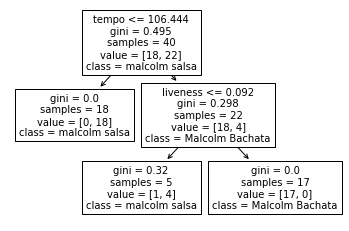

In [33]:
tree.plot_tree(dt
               , feature_names=list(X.columns)
               , class_names=list(y.unique())) 


In [34]:
r = export_text(dt, feature_names=list(X.columns))
print(r)

|--- tempo <= 106.44
|   |--- class: malcolm salsa
|--- tempo >  106.44
|   |--- liveness <= 0.09
|   |   |--- class: malcolm salsa
|   |--- liveness >  0.09
|   |   |--- class: Malcolm Bachata

